In [2]:
# type: ignore
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout 
from sklearn.model_selection import train_test_split 
from sklearn.datasets import make_classification 
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
# 1. Tạo dataset giả lập (phân loại nhị phân) 
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42) 
# 2. Chia tập dữ liệu thành train (80%) và validation (20%) 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) 

In [4]:
#3. Xây dựng mô hình MLP đơn giản
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],))) # Lớp đầu vào
model.add(Dense(32, activation='relu')) # Lớp ẩn
model.add(Dense(1, activation='sigmoid')) # Lớp đầu ra cho phân loại nhị phân
# 4. Compile mô hình
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# 5. Huấn luyện mô hình với dữ liệu train và validate đồng thời
history = model.fit(
    X_train, y_train,
    epochs=20, # Số lượng epoch
    batch_size=32, # Kích thước batch
    validation_data=(X_val, y_val), # Sử dụng tập validation
    verbose=1 # Hiển thị chi tiết quá trình huấn luyện
    )

Epoch 1/20


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5470 - loss: 0.6793 - val_accuracy: 0.7200 - val_loss: 0.5804
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8185 - loss: 0.5238 - val_accuracy: 0.8450 - val_loss: 0.4789
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8847 - loss: 0.4203 - val_accuracy: 0.8500 - val_loss: 0.4132
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8756 - loss: 0.3573 - val_accuracy: 0.8550 - val_loss: 0.3863
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8776 - loss: 0.3245 - val_accuracy: 0.8500 - val_loss: 0.3810
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8888 - loss: 0.3029 - val_accuracy: 0.8550 - val_loss: 0.3770
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9088 - loss: 0.2609 - val_accuracy: 0.8550 - val_loss: 0.3784
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8983 - loss: 0.2725 - val_accuracy: 0.8400 - val_loss: 0.3803
Epo

In [5]:
# Đánh giá mô hình trên tập validation sau huấn luyện 
val_loss, val_accuracy = model.evaluate(X_val, y_val) 
print(f"Validation Loss: {val_loss:.4f}") 
print(f"Validation Accuracy: {val_accuracy:.4f}") 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8243 - loss: 0.4176 
Validation Loss: 0.4055
Validation Accuracy: 0.8450


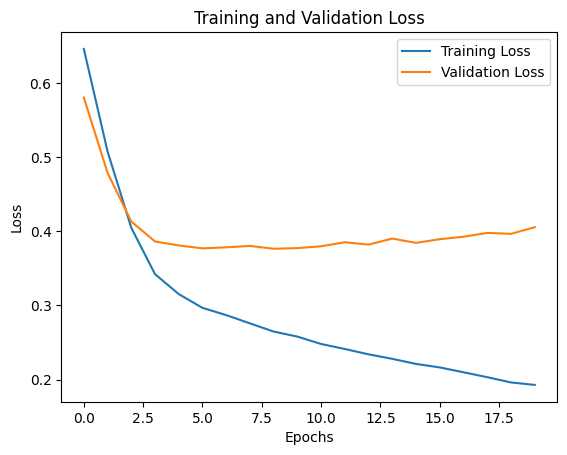

In [6]:
# Vẽ đồ thị Loss (mất mát) giữa train và validation 
plt.plot(history.history['loss'], label='Training Loss') 
plt.plot(history.history['val_loss'], label='Validation Loss') 
plt.title('Training and Validation Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend() 
plt.show()

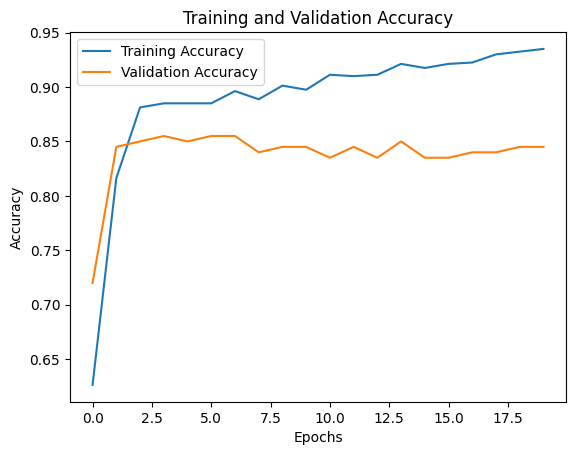

In [7]:
# Vẽ đồ thị Accuracy (độ chính xác) giữa train và validation 
plt.plot(history.history['accuracy'], label='Training Accuracy') 
plt.plot(history.history['val_accuracy'], label='Validation Accuracy') 
plt.title('Training and Validation Accuracy') 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.legend() 
plt.show()

In [8]:
# 4. Xây dựng mô hình MLP với 7 lớp ẩn, 100 neuron và Dropout
model_7_layers = Sequential()
model_7_layers.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  # Lớp đầu vào

# Thêm 7 lớp ẩn với 100 neuron và Dropout
model_7_layers.add(Dense(100, activation='relu'))
model_7_layers.add(Dropout(0.3))  # Dropout 30%

model_7_layers.add(Dense(100, activation='relu'))
model_7_layers.add(Dropout(0.3))

model_7_layers.add(Dense(100, activation='relu'))
model_7_layers.add(Dropout(0.3))

model_7_layers.add(Dense(100, activation='relu'))
model_7_layers.add(Dropout(0.3))

model_7_layers.add(Dense(100, activation='relu'))
model_7_layers.add(Dropout(0.3))

model_7_layers.add(Dense(100, activation='relu'))
model_7_layers.add(Dropout(0.3))

model_7_layers.add(Dense(100, activation='relu'))
model_7_layers.add(Dropout(0.3))

# Lớp đầu ra cho phân loại nhị phân
model_7_layers.add(Dense(1, activation='sigmoid'))

# 4. Compile mô hình
model_7_layers.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 5. Huấn luyện mô hình với dữ liệu train và validate đồng thời
history_7_layers = model_7_layers.fit(
    X_train, y_train,
    epochs=20,  # Số lượng epoch
    batch_size=32,  # Kích thước batch
    validation_data=(X_val, y_val),  # Sử dụng tập validation
    verbose=1  # Hiển thị chi tiết quá trình huấn luyện
)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4731 - loss: 0.7002 - val_accuracy: 0.6200 - val_loss: 0.6781
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5138 - loss: 0.6824 - val_accuracy: 0.7200 - val_loss: 0.5923
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7483 - loss: 0.5713 - val_accuracy: 0.8000 - val_loss: 0.4443
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8168 - loss: 0.4442 - val_accuracy: 0.8250 - val_loss: 0.4279
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8684 - loss: 0.3731 - val_accuracy: 0.8350 - val_loss: 0.3908
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8922 - loss: 0.3245 - val_accuracy: 0.8400 - val_loss: 0.4244
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9122 - loss: 0.2828 - val_accuracy: 0.8350 - val_loss: 0.4003
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9088 - loss: 0.2583 - val_accuracy: 0.8400 - val_loss:

In [9]:
#Đánh giá mô hình trên tập validation sau huấn luyện 
val_loss, val_accuracy = model_7_layers.evaluate(X_val, y_val) 
print(f"Validation Loss: {val_loss:.4f}") 
print(f"Validation Accuracy: {val_accuracy:.4f}") 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7924 - loss: 0.8510 
Validation Loss: 0.7357
Validation Accuracy: 0.8200


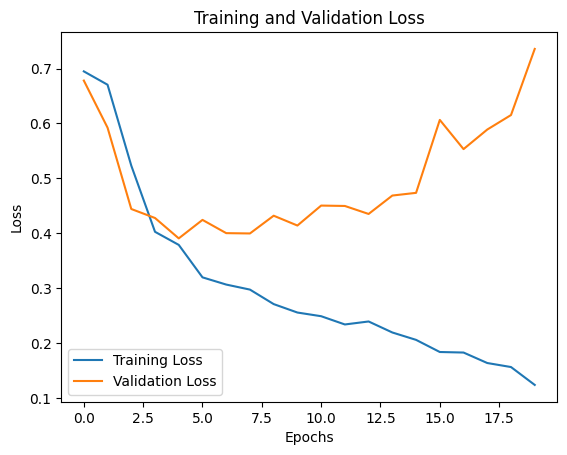

In [10]:
# Vẽ đồ thị Loss (mất mát) giữa train và validation 
plt.plot(history_7_layers.history['loss'], label='Training Loss') 
plt.plot(history_7_layers.history['val_loss'], label='Validation Loss') 
plt.title('Training and Validation Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend() 
plt.show()

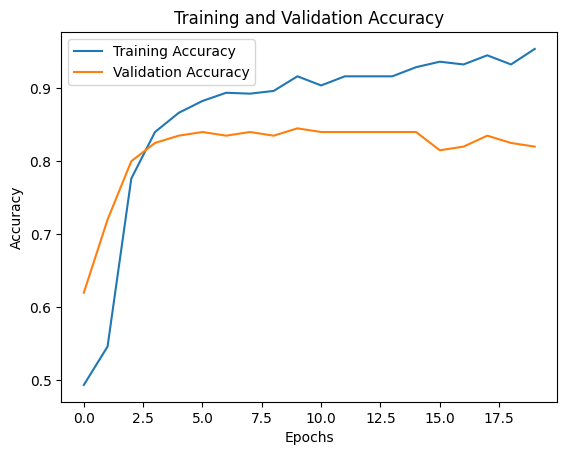

In [11]:
# Vẽ đồ thị Accuracy (độ chính xác) giữa train và validation 
plt.plot(history_7_layers.history['accuracy'], label='Training Accuracy') 
plt.plot(history_7_layers.history['val_accuracy'], label='Validation Accuracy') 
plt.title('Training and Validation Accuracy') 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.legend() 
plt.show()

In [22]:
# 5. CNN
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Reshape the input data to match the expected input shape for Conv1D
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val_cnn = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

model_cnn = Sequential()
model_cnn.add(Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
model_cnn.add(MaxPooling1D(2))
model_cnn.add(Conv1D(64, 3, activation='relu'))
model_cnn.add(MaxPooling1D(2))
model_cnn.add(Conv1D(128, 3, activation='relu'))
model_cnn.add(Flatten())
model_cnn.add(Dense(100, activation='relu'))
model_cnn.add(Dropout(0.3))
model_cnn.add(Dense(1, activation='linear'))

model_cnn.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model_cnn.fit(X_train_cnn, y_train, epochs=20, batch_size=32, validation_data=(X_val_cnn, y_val))

# Đánh giá mô hình trên tập validation sau huấn luyện 
val_loss, val_accuracy = model_cnn.evaluate(X_val_cnn, y_val) 
print(f"Validation Loss: {val_loss:.4f}") 
print(f"Validation Accuracy: {val_accuracy:.4f}") 


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2563 - mae: 0.4569 - val_loss: 0.1613 - val_mae: 0.3411
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1627 - mae: 0.3393 - val_loss: 0.1496 - val_mae: 0.3162
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1369 - mae: 0.2958 - val_loss: 0.1294 - val_mae: 0.2770
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1122 - mae: 0.2618 - val_loss: 0.1259 - val_mae: 0.2846
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1135 - mae: 0.2619 - val_loss: 0.1295 - val_mae: 0.2917
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0962 - mae: 0.2376 - val_loss: 0.1300 - val_mae: 0.2667
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0778 - mae: 0.2035 - val_loss: 0.1210 - val_mae: 0.2585
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0933 - mae: 0.2299 - val_loss: 0.1251 - val_mae: 0.2622
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0762 - mae: 

In [23]:
#6. RNN
from tensorflow.keras.layers import SimpleRNN

model_rnn = Sequential()
model_rnn.add(SimpleRNN(64, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_rnn.add(SimpleRNN(64, activation='relu', return_sequences=True))
model_rnn.add(SimpleRNN(128, activation='relu'))
model_rnn.add(Dense(100, activation='relu'))
model_rnn.add(Dropout(0.3))
model_rnn.add(Dense(1, activation='linear'))

model_rnn.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model_rnn.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

# Đánh giá mô hình trên tập validation sau huấn luyện 
val_loss, val_accuracy = model_rnn.evaluate(X_val, y_val) 
print(f"Validation Loss: {val_loss:.4f}") 
print(f"Validation Accuracy: {val_accuracy:.4f}") 

Epoch 1/20


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.2857 - mae: 0.4696 - val_loss: 0.1420 - val_mae: 0.3146
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1406 - mae: 0.3043 - val_loss: 0.1342 - val_mae: 0.2888
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1188 - mae: 0.2742 - val_loss: 0.1371 - val_mae: 0.2867
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1113 - mae: 0.2534 - val_loss: 0.1213 - val_mae: 0.2784
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1032 - mae: 0.2469 - val_loss: 0.1268 - val_mae: 0.2658
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0859 - mae: 0.2164 - val_loss: 0.1309 - val_mae: 0.2642
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0817 - mae: 0.2110 - val_loss: 0.1180 - val_mae: 0.2584
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0715 - mae: 0.1999 - val_loss: 0.1198 - val_mae: 0.2550
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0617 - mae: 0.1844 - v

In [24]:
# 7. LSTM
from tensorflow.keras.layers import LSTM

# Reshape the input data to match the expected input shape for LSTM
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val_lstm = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

model_lstm = Sequential()
model_lstm.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_lstm.add(LSTM(64, activation='relu', return_sequences=True))
model_lstm.add(LSTM(128, activation='relu'))
model_lstm.add(Dense(100, activation='relu'))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(1, activation='linear'))

model_lstm.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model_lstm.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_data=(X_val_lstm, y_val))

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3842 - mae: 0.4877 - val_loss: 0.2559 - val_mae: 0.4961
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2500 - mae: 0.4883 - val_loss: 0.2369 - val_mae: 0.4731
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2494 - mae: 0.4852 - val_loss: 0.2597 - val_mae: 0.4914
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2548 - mae: 0.4857 - val_loss: 0.2404 - val_mae: 0.4828
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2455 - mae: 0.4806 - val_loss: 0.2582 - val_mae: 0.4906
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2404 - mae: 0.4734 - val_loss: 0.2439 - val_mae: 0.4783
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2389 - mae: 0.4732 - val_loss: 0.2223 - val_mae: 0.4600
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2302 - mae: 0.4558 - val_loss: 0.2201 - val_mae: 0.4569
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.228

In [15]:
# So sánh, đánh giá 3 mô hình với 7_layer với các độ đo MAE, MSE, RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Tính toán các độ đo cho từng mô hình
def evaluate_model(model, X_val, y_val):
    y_pred = model.predict(X_val)
    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    return mae, mse, rmse

# Đánh giá mô hình MLP 7_layer
mae_mlp, mse_mlp, rmse_mlp = evaluate_model(model_7_layers, X_val, y_val)
# Đánh giá mô hình CNN
mae_cnn, mse_cnn, rmse_cnn = evaluate_model(model_cnn, X_val, y_val)
# Đánh giá mô hình RNN
mae_rnn, mse_rnn, rmse_rnn = evaluate_model(model_rnn, X_val, y_val)
# Đánh giá mô hình LSTM
mae_lstm, mse_lstm, rmse_lstm = evaluate_model(model_lstm, X_val, y_val)

# So sánh các độ đo
print(f"MLP 7_layer - MAE: {mae_mlp:.4f}, MSE: {mse_mlp:.4f}, RMSE: {rmse_mlp:.4f}")
print(f"CNN - MAE: {mae_cnn:.4f}, MSE: {mse_cnn:.4f}, RMSE: {rmse_cnn:.4f}")
print(f"RNN - MAE: {mae_rnn:.4f}, MSE: {mse_rnn:.4f}, RMSE: {rmse_rnn:.4f}")
print(f"LSTM - MAE: {mae_lstm:.4f}, MSE: {mse_lstm:.4f}, RMSE: {rmse_lstm:.4f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step
MLP 7_layer - MAE: 0.1966, MSE: 0.1530, RMSE: 0.3912
CNN - MAE: 0.2360, MSE: 0.1192, RMSE: 0.3453
RNN - MAE: 0.2628, MSE: 0.1349, RMSE: 0.3672
LSTM - MAE: 0.4127, MSE: 0.2072, RMSE: 0.4551


+---+-------------+---------------------+---------------------+---------------------+
|   |    Model    |         MAE         |         MSE         |        RMSE         |
+---+-------------+---------------------+---------------------+---------------------+
| 0 | MLP 7-layer | 0.19662443045988937 | 0.15303074711978015 | 0.3911914456117109  |
| 1 |     CNN     | 0.2359998560231179  | 0.11924821671298083 | 0.3453233509523803  |
| 2 |     RNN     | 0.26277480259537694 | 0.13486382873574615 | 0.3672381090460876  |
| 3 |    LSTM     | 0.41268267202191056 | 0.20715437660470776 | 0.45514214988804075 |
+---+-------------+---------------------+---------------------+---------------------+


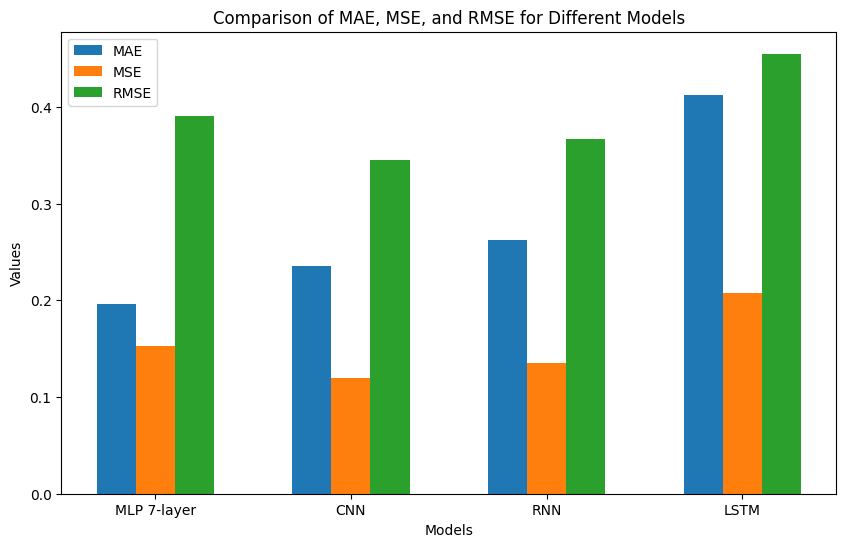

In [32]:
import pandas as pd
from tabulate import tabulate
import seaborn as sns

# Tạo DataFrame chứa các độ đo cho từng mô hình
data = {
    'Model': models,
    'MAE': mae_values,
    'MSE': mse_values,
    'RMSE': rmse_values
}

df_metrics = pd.DataFrame(data)

# Hiển thị bảng với định dạng đẹp
print(tabulate(df_metrics, headers='keys', tablefmt='pretty'))
# Vẽ biểu đồ so sánh các độ đo MAE, MSE, RMSE cho từng mô hình
fig, ax = plt.subplots(figsize=(10, 6))

index = np.arange(len(models))
bar_width = 0.2

bar1 = ax.bar(index, mae_values, bar_width, label='MAE')
bar2 = ax.bar(index + bar_width, mse_values, bar_width, label='MSE')
bar3 = ax.bar(index + 2 * bar_width, rmse_values, bar_width, label='RMSE')

ax.set_xlabel('Models')
ax.set_ylabel('Values')
ax.set_title('Comparison of MAE, MSE, and RMSE for Different Models')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(models)
ax.legend()

plt.show()